In [26]:
def normalize_feature(data,feature):
    q1 = data[feature].quantile(.25)
    q3 = data[feature].quantile(.75)
    IQR = (q3-q1)*1.5
    
    tar_min = q1 -IQR
    tar_max = q3 + IQR
    
    return data[(data[feature] > tar_min) & (data[feature]<tar_max)]

def convert_date(data,feature):
    data[feature] = pd.to_datetime(data[feature])
    data[feature + '_month'] = data[feature].dt.month
    data[feature + '_year'] = data[feature].dt.year
    return data


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

for directory,_,filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(directory,filename))

data/data.parquet
data/train.parquet
data/test.parquet
data/data.csv


In [28]:
train = pd.read_parquet('data/train.parquet')
test = pd.read_parquet('data/test.parquet')


In [29]:
train = train.dropna()
test = test.dropna()

In [30]:
set(train.columns) - set(test.columns)

{'comment_count', 'dislikes', 'likes', 'target', 'view_count'}

In [31]:
train.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-12,fox|fox sports|fs1|fox sports 1|undisputed|ski...,540613,7155,308,1647,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-12,1112.0,True,0.013235
41,OQZ5ht79nEw,Answering Your Assumptions About Us... Merrell...,2020-08-11 17:29:52+00:00,UCwtnkRZcvL4bfopzJ-Von8Q,merrelltwins,23,2020-08-12,Merrell Twins|Twins|Merrell|Veronica Merrell|V...,430836,37754,256,4818,https://i.ytimg.com/vi/OQZ5ht79nEw/default.jpg,False,False,We answered your assumptions about us...Go to ...,OQZ5ht79nEw_2020-08-12,1083.0,True,0.087630


In [32]:
train = normalize_feature(train,'likes')

In [33]:
train = normalize_feature(train,'view_count')

In [34]:
train['description'].apply(lambda x: str(x).split())

40       [LeBron, and, the, Lakers, finally, snapped, t...
41       [We, answered, your, assumptions, about, us......
42       [ShhhhFOLLOW, ME, IN, THESE, PLACES, FOR, UPDA...
43       [In, a, random, and, wild, sequence, of, event...
44       [▷SUBSCRIBE, FOR, DAILY, VLOGS:, http://bit.ly...
                               ...                        
92267    [Olivia, Rodrigo, performs, “traitor”, at, the...
92268    [Booking, travel, is, cheaper, on, Hopper., Do...
92270                                            [#shorts]
92272    [Contracter, email:, Los3topetes@gmail.comFOLL...
92274    [In, today's, video, we, play, squid, games, w...
Name: description, Length: 73525, dtype: object

In [35]:
train['description_len'] = train['description'].apply(lambda x: len(str(x).split()))

In [36]:
train['is_comments_disabled'] = np.where(train['comments_disabled'] == False, 0 ,1)
train['is_ratings_disabled'] = np.where(train['ratings_disabled'] == False, 0 ,1)
train['has_thumbnail'] = np.where(train['has_thumbnail'] == False, 0 ,1)

In [37]:
train['has_thumbnail'] = np.where(train['has_thumbnail'] == False, 0 ,1)

<AxesSubplot:>

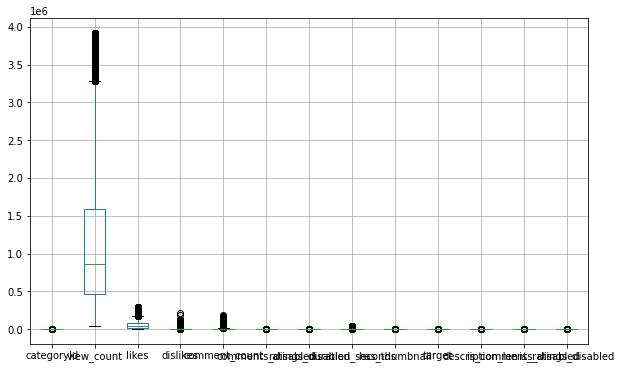

In [38]:
plt.figure(figsize=(10,6))
train.boxplot()

In [39]:
train.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'id', 'duration_seconds',
       'has_thumbnail', 'target', 'description_len', 'is_comments_disabled',
       'is_ratings_disabled'],
      dtype='object')

In [40]:
# train = convert_date(train,'trending_date')
# train = convert_date(train,'publishedAt')

In [41]:
train['tag_amt'] = train['tags'].apply(lambda x: len(x.split('|')))

In [42]:
taglist = list(set(train['tags'].tolist()))

In [43]:
len(taglist)

11642

In [44]:
taglist2 = []
for tag in taglist:
    tag = tag.split('|')
    for t in tag:
        taglist2.append(t)

In [45]:
len(taglist2)

236425

In [46]:
from collections import Counter
counted_words = Counter(taglist2)

In [47]:
new_tags = sorted(counted_words.items(), key = lambda x: x[1],reverse = True)
top100_tags= new_tags[0:101]
top100_tags = [x[0] for x in top100_tags]


In [48]:
for index, row in train.iterrows():
    tagss = row['tags'].split('|')
    for t in tagss:
        if t in top100_tags:
            train[t] = 1
            continue
    else:
        train[t] = 0

In [49]:
train.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,pokemon brilliant diamond shining pearl exploits,Matrix Part 2,barista asmr,back pay,dreamworks,Munir,cyber monday treadmills,Tichina Arnold Soul Train Awards,ROMAN TOO LIT,I was in MrBeast Squid Game
40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-12,fox|fox sports|fs1|fox sports 1|undisputed|ski...,540613,7155,...,0,0,0,0,0,0,0,0,0,0
41,OQZ5ht79nEw,Answering Your Assumptions About Us... Merrell...,2020-08-11 17:29:52+00:00,UCwtnkRZcvL4bfopzJ-Von8Q,merrelltwins,23,2020-08-12,Merrell Twins|Twins|Merrell|Veronica Merrell|V...,430836,37754,...,0,0,0,0,0,0,0,0,0,0
42,zHPVGSwLhcg,Unboxing Apple's $129 Luxury Cable,2020-08-11 14:42:43+00:00,UCsTcErHg8oDvUnTzoqsYeNw,Unbox Therapy,28,2020-08-12,unbox therapy|unboxtherapy|tech|technology|gad...,997102,60993,...,0,0,0,0,0,0,0,0,0,0
43,gi3VMMiFHVg,Giannis Gets Ejected After Headbutting Mo Wagner,2020-08-12 02:30:32+00:00,UC9-OpMMVoNP5o10_Iyq7Ndw,Bleacher Report,17,2020-08-12,bleacher report|br|nba|giannis|giannis antetok...,756814,8278,...,0,0,0,0,0,0,0,0,0,0
44,p6RatnMhDj8,I TOOK A PREGNANCY TEST...,2020-08-11 02:40:01+00:00,UCpGCAsPlArOj9ptyCszxOOg,ValeYas Vlogs,22,2020-08-12,valeyas|vlogs|daily vlogs|beautyybird|pregnanc...,143091,7159,...,0,0,0,0,0,0,0,0,0,0


In [51]:
drop_col = ['description','video_id','title','publishedAt','trending_date','tags'
            ,'channelTitle','id','thumbnail_link','comments_disabled','ratings_disabled']

In [52]:
train = train.drop(drop_col,1)

In [53]:
## future engineering

train = train.drop('channelId',1)

In [54]:
train.columns

Index(['categoryId', 'view_count', 'likes', 'dislikes', 'comment_count',
       'duration_seconds', 'has_thumbnail', 'target', 'description_len',
       'is_comments_disabled',
       ...
       'pokemon brilliant diamond shining pearl exploits', 'Matrix Part 2',
       'barista asmr', 'back pay', 'dreamworks', 'Munir',
       'cyber monday treadmills', 'Tichina Arnold Soul Train Awards',
       'ROMAN TOO LIT', 'I was in MrBeast Squid Game'],
      dtype='object', length=9679)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73525 entries, 40 to 92274
Columns: 9679 entries, categoryId to I was in MrBeast Squid Game
dtypes: float64(2), int64(9677)
memory usage: 5.3 GB


In [56]:
[x for x in train.columns if train[x].dtype == 'Bool']

<ipython-input-56-f667b16cfe2b>:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  [x for x in train.columns if train[x].dtype == 'Bool']


[]

In [57]:
train.to_parquet('data/data.parquet',index=False)

In [58]:
#pd.read_parquet('data/data.parquet',)

,categoryId,view_count,likes,dislikes,comment_count,duration_seconds,has_thumbnail,target,description_len,is_comments_disabled,...,pokemon brilliant diamond shining pearl exploits,Matrix Part 2,barista asmr,back pay,dreamworks,Munir,cyber monday treadmills,Tichina Arnold Soul Train Awards,ROMAN TOO LIT,I was in MrBeast Squid Game
0,17,540613,7155,308,1647,1112.0,1,0.013235,239,0,...,0,0,0,0,0,0,0,0,0,0
1,23,430836,37754,256,4818,1083.0,1,0.087630,70,0,...,0,0,0,0,0,0,0,0,0,0
2,28,997102,60993,8847,13810,438.0,0,0.061170,16,0,...,0,0,0,0,0,0,0,0,0,0
3,17,756814,8278,331,2441,164.0,0,0.010938,40,0,...,0,0,0,0,0,0,0,0,0,0
4,22,143091,7159,349,805,1572.0,0,0.050031,54,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73520,10,2924486,224443,1628,6776,220.0,1,0.076746,326,0,...,0,0,0,0,0,0,0,0,0,0
73521,24,615401,42801,215,3022,1251.0,1,0.069550,67,0,...,0,0,0,0,0,0,0,0,0,0
73522,23,536056,109352,550,4374,59.0,1,0.203994,1,0,...,0,0,0,0,0,0,0,0,0,0
73523,1,194119,14569,180,5276,824.0,1,0.075052,11,0,...,0,0,0,0,0,0,0,0,0,0
